# **MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**



---



Importing the Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix



---



Loading the MNIST data from keras.datasets

In [3]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(X_train[10].shape)

(28, 28)


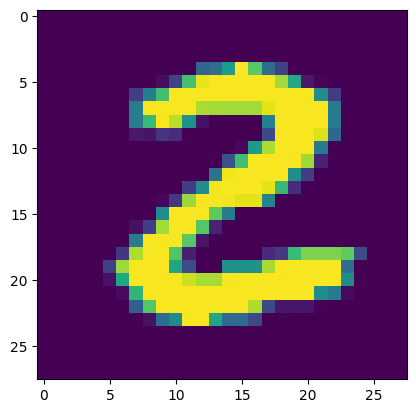

2


In [8]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [9]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [10]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [12]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [14]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2978 - accuracy: 0.9139
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.9585
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1035 - accuracy: 0.9680
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0834 - accuracy: 0.9745
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0699 - accuracy: 0.9782
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9807
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0542 - accuracy: 0.9825
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462 - accuracy: 0.9846
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0416 - accuracy: 0.9864
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.038



---



**Accuracy on Test data:**


In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1197 - accuracy: 0.9727
0.9726999998092651


In [17]:
print(X_test.shape)

(10000, 28, 28)


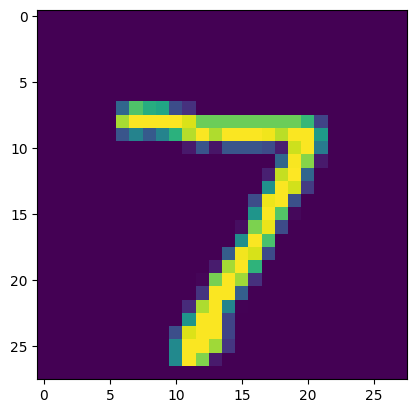

In [18]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [19]:
print(Y_test[0])

7


In [20]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [21]:
print(Y_pred.shape)

(10000, 10)


In [22]:
print(Y_pred[0])

[2.8791914e-05 2.9014869e-02 9.2200702e-01 9.3385750e-01 8.7583379e-07
 2.8216373e-03 3.3282823e-17 1.0000000e+00 1.9033527e-01 9.9849659e-01]


In [23]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [24]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusin Matrix

In [25]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [26]:
print(conf_mat)

tf.Tensor(
[[ 972    0    0    2    0    1    1    1    2    1]
 [   0 1127    1    1    0    3    2    1    0    0]
 [   2    4 1007    6    2    2    0    4    5    0]
 [   0    0    6  984    0    6    0    8    3    3]
 [   2    1    3    0  961    0    4    2    0    9]
 [   3    1    0   18    3  855    3    2    6    1]
 [   7    2    1    1   10   14  920    1    2    0]
 [   1    6    6    8    0    0    1 1000    0    6]
 [   5    2    8   11    4   10    2    5  921    6]
 [   2    3    0    6   13    4    0    9    3  969]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

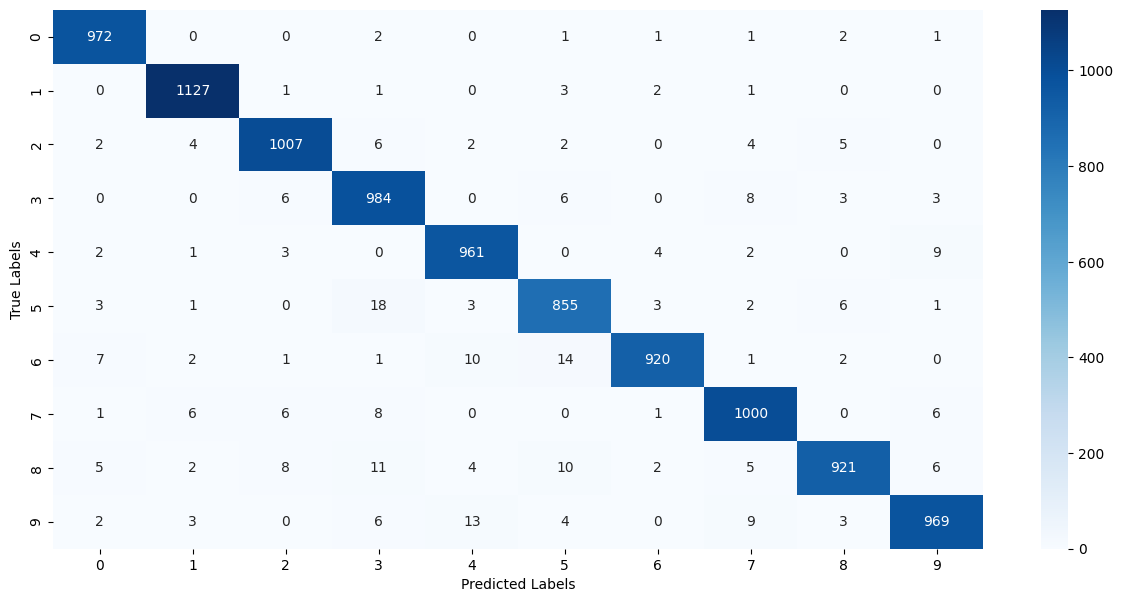

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')



---



**Building a Predictive System**

In [28]:
input_image_path = '/content/sample_data/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [29]:
type(input_image)

numpy.ndarray

In [30]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


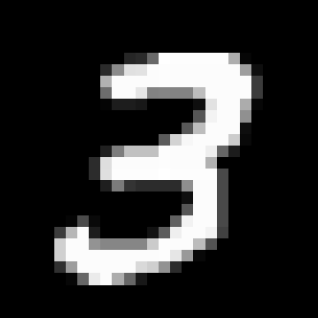

In [31]:
cv2_imshow(input_image)

In [32]:
input_image.shape

(318, 318, 3)

In [33]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [34]:
grayscale.shape

(318, 318)

In [35]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [36]:
input_image_resize.shape

(28, 28)

In [37]:
input_image_resize

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

In [38]:
input_image_resize = input_image_resize/255

In [39]:
type(input_image_resize)

numpy.ndarray

In [40]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [41]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 26ms/step
[[2.4257449e-08 8.8287547e-02 3.9641169e-01 1.0000000e+00 1.0013742e-15
  8.4196383e-01 8.4883380e-18 7.3235653e-02 9.9171150e-01 1.4641947e-02]]


In [42]:
input_pred_label = np.argmax(input_prediction)

In [43]:
print(input_pred_label)

3




---



Path of the image to be predicted: /content/sample_data/MNIST_digit.png


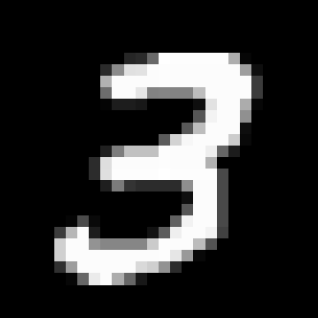

1/1 [==============================] - 0s 20ms/step
The Handwritten Digit is recognised as  3


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)